<a href="https://colab.research.google.com/github/dejokz/ML-Competitions/blob/main/Predict_news_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cover Pic
[Predict the News Category Hackathon](https://machinehack.com/hackathons/predict_the_news_category_hackathon/overview)

**Important points**  
* training set: 7,628 records Size of test set: 2,748 records

**Features**


*   *Story*: A part of the main content of the article to be published as a piece of news
*   *SECTION*: The genre/category the STORY falls in  

There are four distinct sections where each story may fall in to. The Sections are labelled as follows : Politics: 0 Technology: 1 Entertainment: 2 Business: 3



![Cover Pic](https://files.oaiusercontent.com/file-0S8eEjLW0i1Sk8RtmU3Z4BKG?se=2024-02-06T12%3A51%3A12Z&sp=r&sv=2021-08-06&sr=b&rscc=max-age%3D31536000%2C%20immutable&rscd=attachment%3B%20filename%3D03dac6f3-4c05-4887-a656-d8b56add6723.webp&sig=X7M/s3IfcyGmcV60bgNGF8S0iD0V0m6NFLRMlmiPatU%3D)

# Load Dataset and Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/dataset/Predict_news_cat/Data_Train.xlsx')
test = pd.read_excel('/content/drive/MyDrive/dataset/Predict_news_cat/Data_Test.xlsx')
sample = pd.read_excel('/content/drive/MyDrive/dataset/Predict_news_cat/Sample_submission.xlsx')

In [ ]:
sample.head()

,SECTION
0,3
1,3
2,3
3,3
4,3


# EDA

In [ ]:
print(f"Number of rows and columns in dataset(train): {df.shape}")
df.dtypes

Number of rows and columns in dataset(train): (7628, 2)


STORY      object
SECTION     int64
dtype: object

In [ ]:
df.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [ ]:
#create a mapping of section numbers to labels
section_labels = {0: 'Politics', 1: 'Technology', 2: 'Entertainment', 3: 'Business'}
# Apply the mapping to create a new column with the corresponding labels
df['Section_Label'] = df['SECTION'].map(section_labels)

# Count the number of stories in each section
section_counts = df['Section_Label'].value_counts().reset_index()
section_counts.columns = ['Section_Label', 'COUNT']

# Create a bar chart
fig = px.bar(section_counts, x='Section_Label', y='COUNT', title='Distribution of News Sections')
fig.show()


In [ ]:
df['story_length'] = df['STORY'].apply(len)

In [ ]:
df

,STORY,SECTION,story_length,Section_Label
0,But the most painful was the huge reversal in ...,3,843,Business
1,How formidable is the opposition alliance amon...,0,129,Politics
2,Most Asian currencies were trading lower today...,3,386,Business
3,"If you want to answer any question, click on ‘...",1,587,Technology
4,"In global markets, gold prices edged up today ...",3,299,Business
...,...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,394,Politics
7624,"The film, which also features Janhvi Kapoor, w...",2,136,Entertainment
7625,The database has been created after bringing t...,1,484,Technology
7626,"The state, which has had an uneasy relationshi...",0,1927,Politics


## Word Cloud

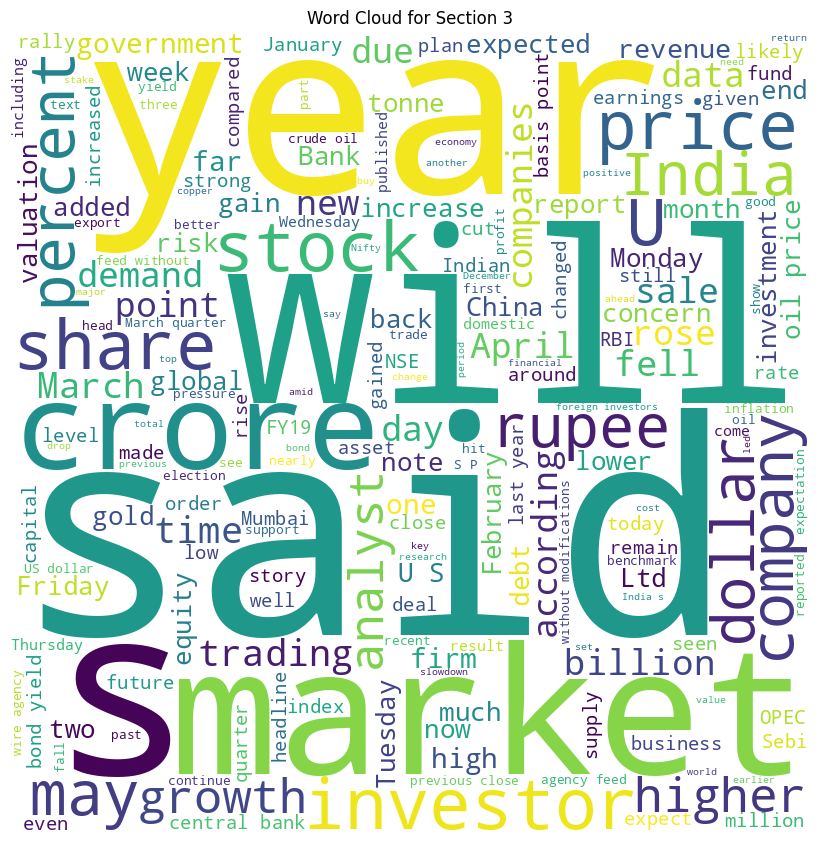

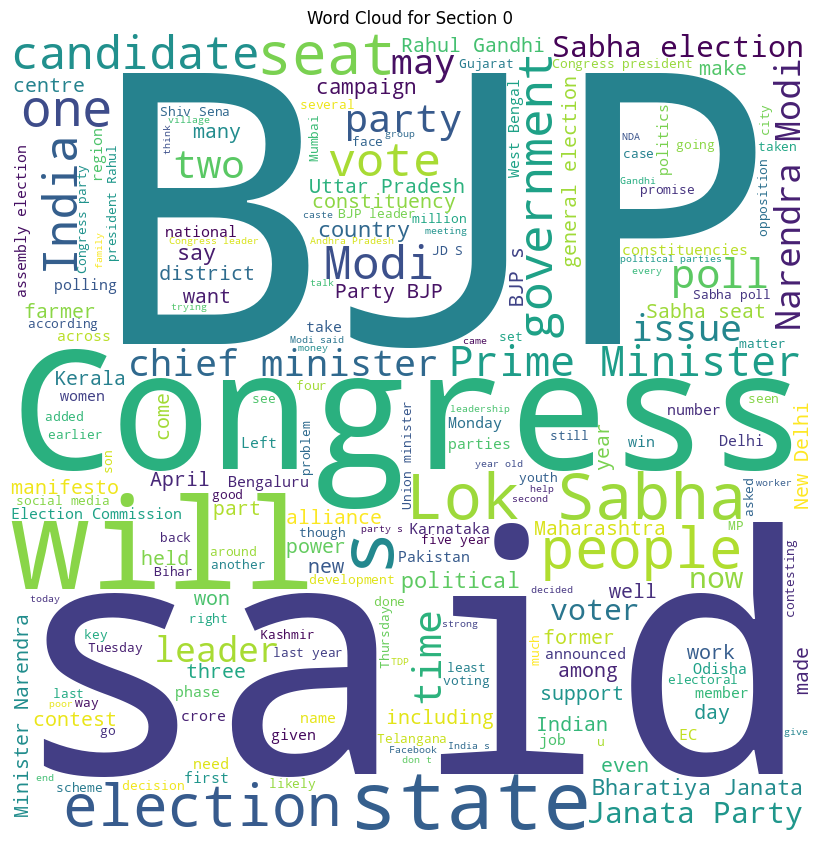

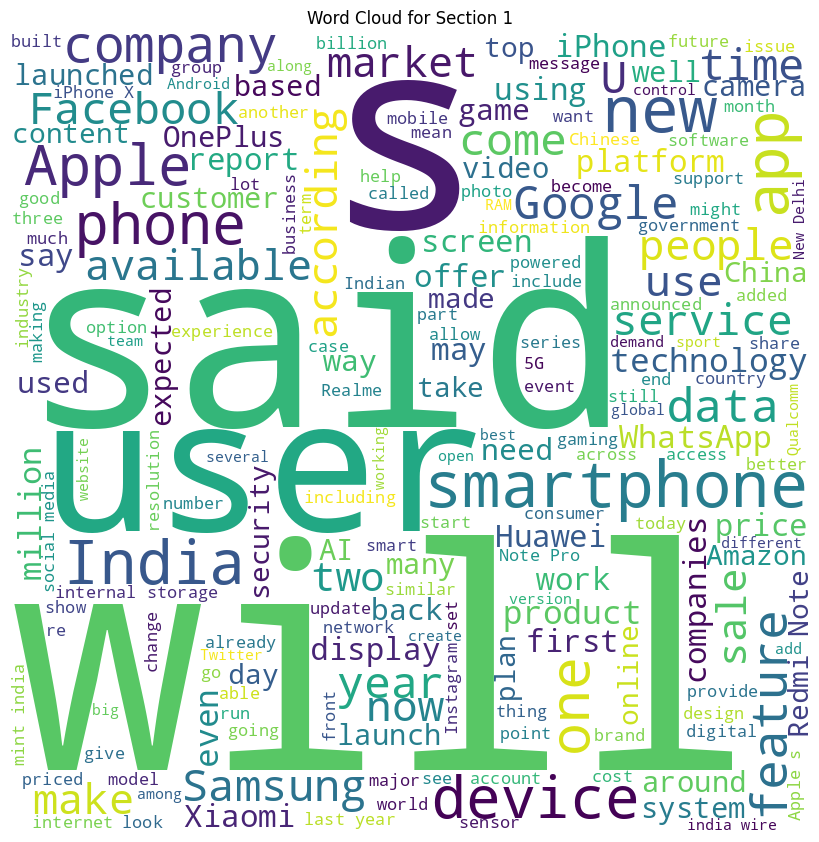

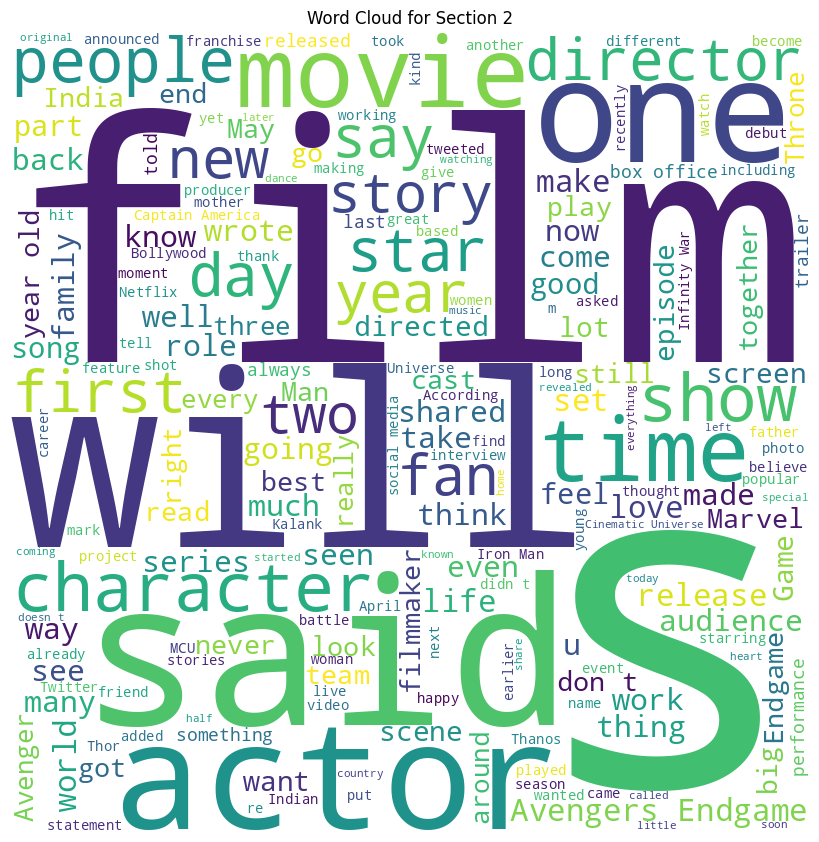

In [ ]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(text)

    # Plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

# Assuming your dataset is named 'data' and it contains the 'STORY' and 'SECTION' columns
for section in df['SECTION'].unique():
    section_data = df[df['SECTION'] == section]
    all_text = ' '.join(section_data['STORY'].tolist())
    generate_wordcloud(all_text, f"Word Cloud for Section {section}")


## Word Frequency Analysis

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Let's take the text from one section as an example
text = ' '.join(df[df['SECTION'] == 0]['STORY'].tolist())  # Example for Politics

# Tokenize
tokens = word_tokenize(text)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation and non-alphabetic tokens
words = [word for word in tokens if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Frequency distribution
frequency_dist = nltk.FreqDist(words)

# Most common words
most_common_words = frequency_dist.most_common(20)
print(most_common_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('bjp', 1799), ('congress', 1676), ('party', 1547), ('said', 1354), ('modi', 945), ('elections', 925), ('minister', 861), ('state', 841), ('sabha', 808), ('lok', 807), ('seats', 782), ('also', 703), ('government', 681), ('election', 665), ('people', 639), ('india', 621), ('political', 592), ('chief', 525), ('gandhi', 512), ('one', 463)]


**ANOVA(Analysis of Variance)** to test if there is a significant differences in story length across different sections

In [ ]:
import scipy.stats as stats

# Assuming 'data' is your DataFrame with a 'story_length' column and a 'SECTION' column
fvalue, pvalue = stats.f_oneway(df['story_length'][df['SECTION'] == 0],
                                df['story_length'][df['SECTION'] == 1],
                                df['story_length'][df['SECTION'] == 2],
                                df['story_length'][df['SECTION'] == 3])

print(f"F-value: {fvalue}, p-value: {pvalue}")


F-value: 394.4950651606234, p-value: 3.260150468564594e-238


In [ ]:
section_names = {0: 'Politics', 1: 'Technology', 2: 'Entertainment', 3: 'Business'}
df['Section_Name'] = df['SECTION'].map(section_names)

# Create box plots with Plotly
fig = px.box(df, x='Section_Name', y='story_length',
             title='Story Length by Section',
             labels={'story_length': 'Story Length', 'Section_Name': 'Section'})

# Show the plot
fig.show()

In [ ]:
df.drop('Section_Name', axis=1)

,STORY,SECTION,story_length,Section_Label,preprocessed
0,But the most painful was the huge reversal in ...,3,843,Business,"[painful, huge, reversal, fee, income, unheard..."
1,How formidable is the opposition alliance amon...,0,129,Politics,"[formidable, opposition, alliance, among, cong..."
2,Most Asian currencies were trading lower today...,3,386,Business,"[asian, currencies, trading, lower, today, sou..."
3,"If you want to answer any question, click on ‘...",1,587,Technology,"[want, answer, question, click, answer, clicki..."
4,"In global markets, gold prices edged up today ...",3,299,Business,"[global, markets, gold, prices, edged, today, ..."
...,...,...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,394,Politics,"[karnataka, congress, bastion, also, gave, bjp..."
7624,"The film, which also features Janhvi Kapoor, w...",2,136,Entertainment,"[film, also, features, janhvi, kapoor, revolve..."
7625,The database has been created after bringing t...,1,484,Technology,"[database, created, bringing, together, crimin..."
7626,"The state, which has had an uneasy relationshi...",0,1927,Politics,"[state, uneasy, relationship, mainland, since,..."


# Word Embedding

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import string
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [ ]:
# Apply preprocessing to each story
df['preprocessed'] = df['STORY'].apply(preprocess_text)
preprocessed_stories = df['preprocessed'].tolist()

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=preprocessed_stories, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Function to create a document vector by averaging word vectors
def document_vector(model, doc):
    doc = [word for word in doc if word in model.wv.index_to_key]
    if not doc:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Generate embeddings for each story
story_embeddings = np.array([document_vector(word2vec_model, story) for story in preprocessed_stories])


In [ ]:
story_embeddings.shape

(7628, 100)

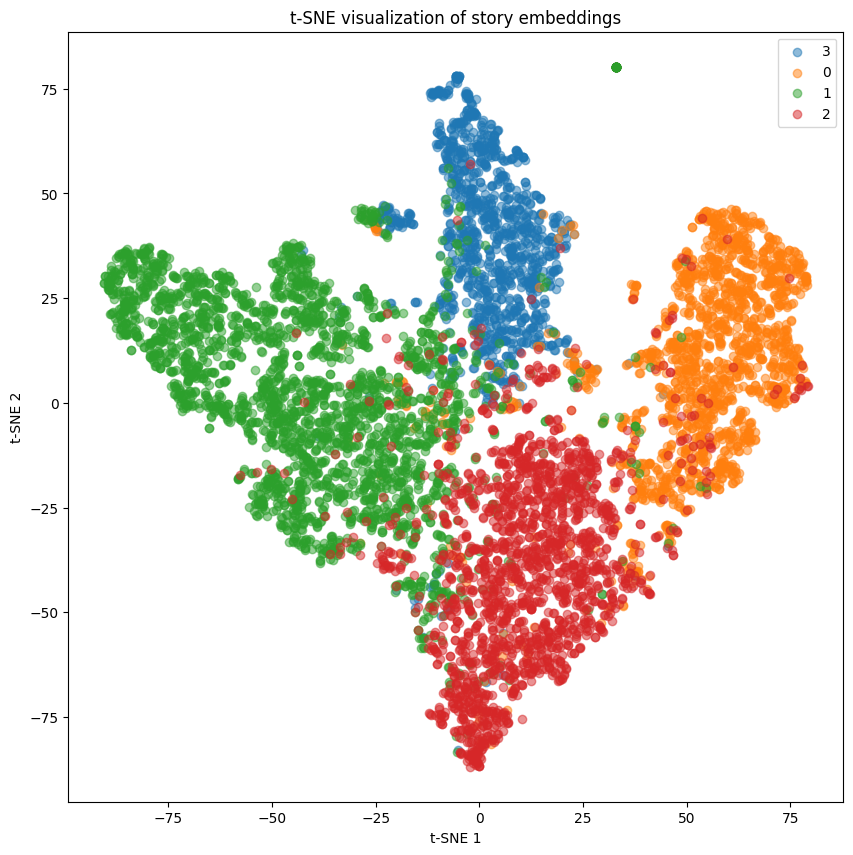

In [ ]:
# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(story_embeddings)

# Plotting
plt.figure(figsize=(10, 10))
for section in df['SECTION'].unique():
    indices = df[df['SECTION'] == section].index
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=section, alpha=0.5)
plt.legend()
plt.title('t-SNE visualization of story embeddings')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


# SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline

## Data spliting

In [ ]:
# Add the story_length to your story_embeddings as an additional feature
story_length = df['story_length'].values.reshape(-1, 1)  # Reshape for concatenation
features = np.hstack((story_embeddings, story_length))  # Combine the two feature sets

In [ ]:
sections = df['SECTION'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, sections, test_size=0.2, random_state=42)

# SVM training and prediction

In [ ]:
# SVMs require scaling of data
pipeline = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

In [ ]:
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9469200524246396
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       323
           1       0.96      0.95      0.96       549
           2       0.94      0.95      0.95       402
           3       0.93      0.96      0.95       252

    accuracy                           0.95      1526
   macro avg       0.94      0.95      0.95      1526
weighted avg       0.95      0.95      0.95      1526



In [ ]:
import pandas as pd
import numpy as np

test['preprocessed'] = test['STORY'].apply(preprocess_text)

# Generate story embeddings for the test dataset using the same Word2Vec model
# Assuming 'word2vec_model' is the trained Word2Vec model from earlier
test_embeddings = np.array([document_vector(word2vec_model, story) for story in test['preprocessed'].tolist()])

# Calculate story lengths for the test dataset
test['story_length'] = test['STORY'].apply(len)

# Combine the story embeddings with the story length feature
story_length_test = test['story_length'].values.reshape(-1, 1)  # reshape for concatenation
test_features = np.hstack((test_embeddings, story_length_test))  # combine the two feature sets

# Scale the features using the same scaler fitted on the training data
# Assuming 'pipeline' is the trained pipeline containing the StandardScaler and SVM from earlier
# Note: Use the scaler from the pipeline to transform the test data
scaler = pipeline.named_steps['standardscaler']
test_features_scaled = scaler.transform(test_features)

# Predict the 'SECTION' with the trained model
predicted_sections = pipeline.named_steps['svc'].predict(test_features_scaled)

# Create a DataFrame with the predicted section labels
predictions_df = pd.DataFrame(predicted_sections, columns=['SECTION'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [ ]:
# Save the predictions to a CSV file
predictions_df.to_csv('./predictions.csv', index=False)

In [ ]:
!ls

drive  predictions.csv	sample_data


Achieved a public score of 0.94905(baseline score)

Things to do for improvement:  
*Ensemble models*
